In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [2]:
# Training data
data_dir = 'train/'

# Image transformations (data preprocessing)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = ImageFolder(root=data_dir, transform=transform)

In [3]:
import torch.nn as nn
import torch

In [4]:
class CNN_Network(nn.Module):
    def __init__(self):
        super(CNN_Network, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        return x

In [5]:
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

In [6]:
# Define the Net
net = CNN_Network()

# Define the hyperparameters
batch_size = 4
learning_rate = 0.001
num_epochs = 20

# Create a data loader for the dataset
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [7]:
# Train the model
for epoch in tqdm(range(num_epochs), desc='Epoch Progress'):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        #if i % 100 == 99:    # Print 100 mini batches
            #print(f'Epoch {epoch+1}, Batch {i+1}/{len(train_loader)}, Loss: {running_loss/100:.4f}')
            #running_loss = 0.0
    epoch_loss = running_loss/len(train_loader)
    epoch_acc = 100*correct/total
    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.2f}%")

Epoch Progress:   5%|█████▊                                                                                                             | 1/20 [00:08<02:32,  8.03s/it]

Epoch 1 Loss: 8.2424 Accuracy: 22.96%


Epoch Progress:  10%|███████████▌                                                                                                       | 2/20 [00:16<02:26,  8.14s/it]

Epoch 2 Loss: 7.2340 Accuracy: 33.50%


Epoch Progress:  15%|█████████████████▎                                                                                                 | 3/20 [00:24<02:21,  8.31s/it]

Epoch 3 Loss: 6.4389 Accuracy: 41.71%


Epoch Progress:  20%|███████████████████████                                                                                            | 4/20 [00:33<02:14,  8.38s/it]

Epoch 4 Loss: 5.8990 Accuracy: 47.18%


Epoch Progress:  25%|████████████████████████████▊                                                                                      | 5/20 [00:41<02:05,  8.35s/it]

Epoch 5 Loss: 5.3845 Accuracy: 50.96%


Epoch Progress:  30%|██████████████████████████████████▌                                                                                | 6/20 [00:49<01:57,  8.37s/it]

Epoch 6 Loss: 4.9034 Accuracy: 55.79%


Epoch Progress:  35%|████████████████████████████████████████▎                                                                          | 7/20 [00:58<01:48,  8.33s/it]

Epoch 7 Loss: 4.1885 Accuracy: 61.89%


Epoch Progress:  40%|██████████████████████████████████████████████                                                                     | 8/20 [01:06<01:39,  8.29s/it]

Epoch 8 Loss: 3.6147 Accuracy: 66.96%


Epoch Progress:  45%|███████████████████████████████████████████████████▊                                                               | 9/20 [01:14<01:32,  8.37s/it]

Epoch 9 Loss: 3.0131 Accuracy: 72.79%


Epoch Progress:  50%|█████████████████████████████████████████████████████████                                                         | 10/20 [01:23<01:23,  8.34s/it]

Epoch 10 Loss: 2.3246 Accuracy: 78.86%


Epoch Progress:  55%|██████████████████████████████████████████████████████████████▋                                                   | 11/20 [01:31<01:15,  8.36s/it]

Epoch 11 Loss: 1.9523 Accuracy: 82.18%


Epoch Progress:  60%|████████████████████████████████████████████████████████████████████▍                                             | 12/20 [01:39<01:06,  8.35s/it]

Epoch 12 Loss: 1.6015 Accuracy: 86.43%


Epoch Progress:  65%|██████████████████████████████████████████████████████████████████████████                                        | 13/20 [01:48<00:59,  8.45s/it]

Epoch 13 Loss: 1.3013 Accuracy: 89.14%


Epoch Progress:  70%|███████████████████████████████████████████████████████████████████████████████▊                                  | 14/20 [01:56<00:50,  8.36s/it]

Epoch 14 Loss: 0.9931 Accuracy: 91.43%


Epoch Progress:  75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 15/20 [02:05<00:41,  8.34s/it]

Epoch 15 Loss: 0.9247 Accuracy: 92.14%


Epoch Progress:  80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 16/20 [02:13<00:33,  8.35s/it]

Epoch 16 Loss: 1.0009 Accuracy: 91.43%


Epoch Progress:  85%|████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 17/20 [02:21<00:25,  8.33s/it]

Epoch 17 Loss: 0.7874 Accuracy: 93.39%


Epoch Progress:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 18/20 [02:29<00:16,  8.31s/it]

Epoch 18 Loss: 0.6656 Accuracy: 94.61%


Epoch Progress:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 19/20 [02:38<00:08,  8.33s/it]

Epoch 19 Loss: 0.8608 Accuracy: 93.29%


Epoch Progress: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:46<00:00,  8.33s/it]

Epoch 20 Loss: 0.6924 Accuracy: 94.82%


In [8]:
# Saved model
PATH = './CNNModel.pth'
torch.save(net.state_dict(), PATH)

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [10]:
test_datadir = "test/"
test_dataset = ImageFolder(root=test_datadir, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=64)

Accuracy: 0.425


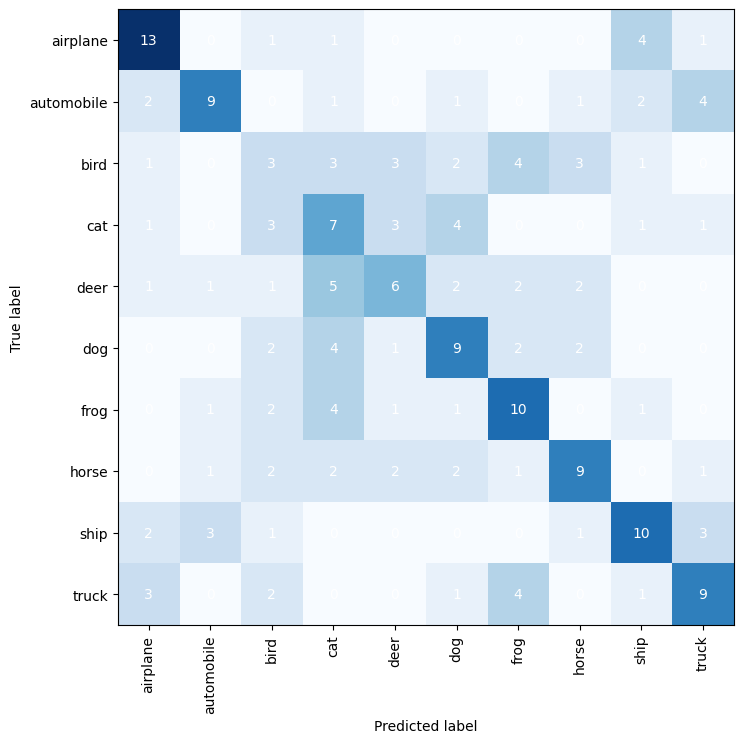

In [11]:
# Load the trained model
model = CNN_Network()
model.load_state_dict(torch.load(PATH))
model.eval()

# Evaluate the model on the test dataset
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute the accuracy and confusion matrix
accuracy = sum([1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))]) / len(y_true)
print("Accuracy:", accuracy)

classes = dataset.classes
conf_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(conf_matrix, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [13]:
# Create input tensor with the correct shape
example_input = torch.randn(1, 3, 32, 32)

# Convert the PyTorch model to TorchScript
model_convert = CNN_Network()
traced_script_module = torch.jit.trace(model_convert, example_input)
traced_script_module.save('CNNModel.ptc') # save the TorchScript model